In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [0]:
X_data_train = np.load("/content/drive/My Drive/CNN/X_train_cnn.npz")
X_train = X_data_train['arr_0']
X_data_test = np.load("/content/drive/My Drive/CNN/X_test_cnn.npz")
X_test = X_data_test['arr_0']

y_data_train = np.load("/content/drive/My Drive/CNN/y_train_cnn.npz")
y_train = y_data_train['arr_0']
y_data_test = np.load("/content/drive/My Drive/CNN/y_test_cnn.npz")
y_test = y_data_test['arr_0']

print('X_train : ', X_train.shape, 'y_train : ', y_train.shape)
print('X_test : ', X_test.shape, 'y_test : ', y_test.shape)


X_train :  (7022, 178, 178, 3) y_train :  (7022, 6)
X_test :  (1755, 178, 178, 3) y_test :  (1755, 6)


In [0]:
#normalizamos las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0


print('X_train : ', X_train.shape, 'X_test : ', X_test.shape)

X_train :  (7022, 178, 178, 3) X_test :  (1755, 178, 178, 3)


In [0]:
#Para visualizar las imagenes
import numpy as np
import matplotlib.pyplot as plt
mapa_etiquetas = {0: 'diamante', 1: 'ovalado', 2: 'alargado', 3: 'cuadrado', 4: 'redondo', 5: 'triangulo'}
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

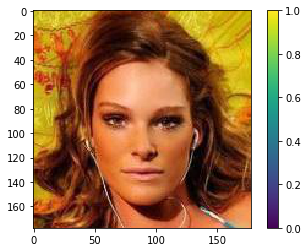

ovalado


In [0]:
visualize_example(X_test[15])
print(mapa_etiquetas[np.argmax(y_test[15])])

In [0]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

modelo = Sequential(name = "custom VGG")

#capas de entrada
modelo.add(Conv2D(32, (3, 3), input_shape = (178, 178, 3), activation = 'relu', padding='same', kernel_initializer='he_uniform'))
modelo.add(BatchNormalization())
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.3))
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.4))
modelo.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(6, activation='softmax'))
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
opt = Adam(lr = 0.0002, beta_1 = 0.5)
modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

from contextlib import redirect_stdout
with open('model_cnn.txt', 'w') as f:
    with redirect_stdout(f):
        modelo.summary()

Model: "custom VGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 89, 89, 64)        1

"from contextlib import redirect_stdout\nwith open('model_cnn.txt', 'w') as f:\n    with redirect_stdout(f):\n        modelo.summary()"

In [0]:
#aumento de datos
# create data generator
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=10)
validation_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=10)
# prepare iterator
train_datagen.fit(X_train)
validation_datagen.fit(X_test)
# fit model
steps = int(X_train.shape[0] / 16)
training_generator = train_datagen.flow(X_train, y_train, batch_size=16, seed=7)
validation_generator = validation_datagen.flow(X_test, y_test, batch_size=16, seed=7)

Epoch 1/50
438/438 [==============================] - 69s 157ms/step - loss: 2.3490 - acc: 0.2254 - val_loss: 4.0710 - val_acc: 0.1836
Epoch 2/50
438/438 [==============================] - 60s 137ms/step - loss: 2.0253 - acc: 0.2488 - val_loss: 10.8444 - val_acc: 0.1836
Epoch 3/50
438/438 [==============================] - 61s 139ms/step - loss: 1.9027 - acc: 0.2936 - val_loss: 5.1975 - val_acc: 0.2188
Epoch 4/50
438/438 [==============================] - 62s 141ms/step - loss: 1.8022 - acc: 0.3176 - val_loss: 4.0000 - val_acc: 0.2461
Epoch 5/50
438/438 [==============================] - 62s 141ms/step - loss: 1.7409 - acc: 0.3527 - val_loss: 2.7089 - val_acc: 0.3203
Epoch 6/50
438/438 [==============================] - 62s 142ms/step - loss: 1.6865 - acc: 0.3645 - val_loss: 1.6582 - val_acc: 0.4141
Epoch 7/50
438/438 [==============================] - 62s 142ms/step - loss: 1.6164 - acc: 0.3838 - val_loss: 1.4161 - val_acc: 0.4766
Epoch 8/50
438/438 [==============================] - 

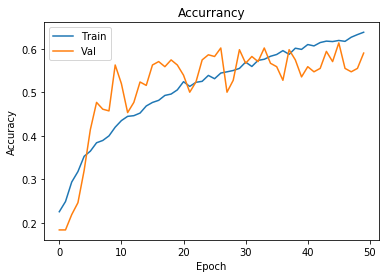

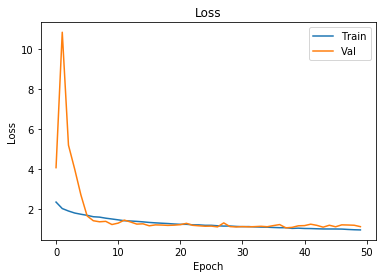

In [0]:
#Entrenamiento de modelo
history = modelo.fit_generator(training_generator, validation_data=validation_generator, steps_per_epoch=steps,
                               epochs=50, validation_steps=16, verbose=1)
plot_acc(history, title='Accurrancy')
plot_loss(history, title='Loss')
modelo.save("/content/drive/My Drive/CNN/resultado/modelo.h5")

In [0]:
from tensorflow.keras.applications import resnet
from tensorflow.keras.models import Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x) # New FC layer, random init
        x = Dropout(dropout)(x)
    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model 


base_model = resnet.ResNet50(weights='imagenet', 
                      include_top=False, input_shape=(178, 178, 3))
fc_layers = [512, 512, 512, 512]
modelo_pre = build_finetune_model(base_model, dropout=0.5, fc_layers=fc_layers, num_classes = 6)
opt = Adam(lr = 0.0002, beta_1 = 0.5)
modelo_pre.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


Epoch 1/40
438/438 [==============================] - 92s 210ms/step - loss: 2.1702 - acc: 0.1649 - val_loss: 1.7876 - val_acc: 0.2422
Epoch 2/40
438/438 [==============================] - 78s 177ms/step - loss: 1.8050 - acc: 0.2014 - val_loss: 1.7096 - val_acc: 0.2500
Epoch 3/40
438/438 [==============================] - 78s 177ms/step - loss: 1.6892 - acc: 0.2656 - val_loss: 1.5635 - val_acc: 0.3242
Epoch 4/40
438/438 [==============================] - 78s 178ms/step - loss: 1.6152 - acc: 0.2893 - val_loss: 1.4841 - val_acc: 0.2930
Epoch 5/40
438/438 [==============================] - 78s 178ms/step - loss: 1.5574 - acc: 0.3046 - val_loss: 1.5392 - val_acc: 0.3438
Epoch 6/40
438/438 [==============================] - 78s 178ms/step - loss: 1.5498 - acc: 0.3134 - val_loss: 1.5429 - val_acc: 0.3281
Epoch 7/40
438/438 [==============================] - 78s 177ms/step - loss: 1.5189 - acc: 0.3399 - val_loss: 1.4468 - val_acc: 0.4180
Epoch 8/40
438/438 [==============================] - 7

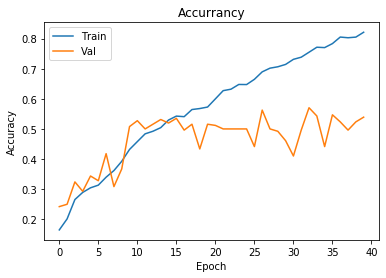

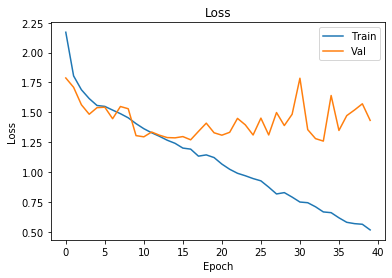

In [0]:
history_pre = modelo_pre.fit_generator(training_generator, validation_data=validation_generator, steps_per_epoch=steps,
                               epochs=40, validation_steps=16, verbose=1)

plot_acc(history_pre, title='Accurrancy')
plot_loss(history_pre, title='Loss')

modelo_pre.save_weights("/content/drive/My Drive/CNN/resultado/modelo_pre_res_w.h5")

In [0]:
from tensorflow.keras.applications import densenet
from tensorflow.keras.models import Model

modelo_base_dense = densenet.DenseNet121(input_shape = (178, 178, 3), weights='imagenet', include_top = False, pooling='avg')

for layer in modelo_base_dense.layers:
    layer.trainable = True

modelo_dense = modelo_base_dense.output
modelo_dense = Dense(256, activation='relu', kernel_initializer='he_uniform')(modelo_dense)
modelo_dense = BatchNormalization()(modelo_dense)
modelo_dense = Dropout(0.5)(modelo_dense)


predictions = Dense(6, activation='softmax')(modelo_dense)
modelo_pre_dense = Model(inputs=modelo_base_dense.input, outputs=predictions)

#opt = SGD(lr=0.001, momentum=0.9)
opt = Adam(lr = 0.0002, beta_1 = 0.5)
modelo_pre_dense.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

29089792/29084464 [==============================] - 1s 0us/step


Epoch 1/20
438/438 [==============================] - 96s 218ms/step - loss: 2.1754 - acc: 0.2926 - val_loss: 1.9454 - val_acc: 0.4141
Epoch 2/20
438/438 [==============================] - 69s 156ms/step - loss: 1.6322 - acc: 0.4199 - val_loss: 1.3442 - val_acc: 0.5234
Epoch 3/20
438/438 [==============================] - 69s 158ms/step - loss: 1.4133 - acc: 0.4839 - val_loss: 1.9379 - val_acc: 0.4414
Epoch 4/20
438/438 [==============================] - 69s 158ms/step - loss: 1.3438 - acc: 0.5133 - val_loss: 1.5212 - val_acc: 0.4727
Epoch 5/20
438/438 [==============================] - 69s 157ms/step - loss: 1.2237 - acc: 0.5435 - val_loss: 1.2141 - val_acc: 0.5430
Epoch 6/20
438/438 [==============================] - 69s 158ms/step - loss: 1.1609 - acc: 0.5634 - val_loss: 1.2623 - val_acc: 0.5742
Epoch 7/20
438/438 [==============================] - 69s 159ms/step - loss: 1.0992 - acc: 0.5914 - val_loss: 1.2879 - val_acc: 0.5547
Epoch 8/20
438/438 [==============================] - 6

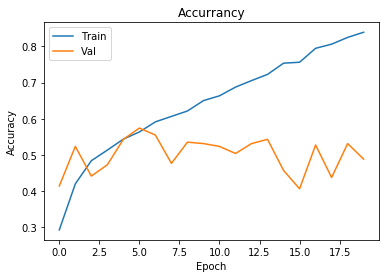

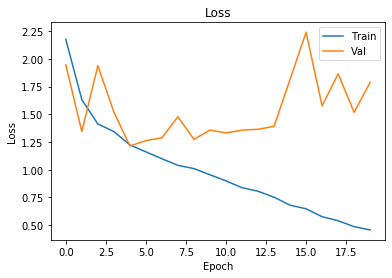

In [0]:
history_pre_dense = modelo_pre_dense.fit_generator(training_generator, validation_data=validation_generator, steps_per_epoch=steps,
                               epochs=20, validation_steps=16, verbose=1)

plot_acc(history_pre_dense, title='Accurrancy')
plot_loss(history_pre_dense, title='Loss')

modelo_pre_dense.save_weights("/content/drive/My Drive/CNN/resultado/modelo_pre_dense_w.h5")